# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns

# Testando agrupamento hierárquico
Inicialmente, vamos carregar um conjunto de dados (sintético) para testar a execução de três algoritmos de agrupamento hierárquico: single-link, complete-link, average-link

In [2]:
df = pd.read_csv('data\segmentation data.csv')
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [3]:
df = df.drop(['ID'], axis = 1)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


# Usando PCA

Agora vem a parte crítica: as próximas linhas de código projetarão os dados em componentes principais bidimensionais.

Utilizaremos a biblioteca sklearn para importar o módulo PCA e, no método PCA, passará o número de componentes (n_components=2) e finalmente chamará fit_transform nos dados agregados. Aqui, vários componentes representam a dimensão inferior na qual projetaremos nossos dados de dimensão superior.

In [4]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(df)

A seguir, vamos criar um DataFrame que terá os valores dos componentes principais para todas as amostras.

In [5]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['x', 'y'])

In [6]:
principal_df

,x,y
0,3715.584256,30.714783
1,29818.579389,-17.036943
2,-31744.417466,16.420804
3,50610.581674,3.789668
4,28076.582639,14.143742
...,...,...
1995,2570.582129,10.823820
1996,-3210.419923,-8.574641
1997,-34554.419339,-1.306651
1998,-22986.420137,-9.494583


In [7]:
print('Variação explicada por componente principal: {}'.format(pca_df.explained_variance_ratio_))

Variação explicada por componente principal: [9.99999915e-01 8.37079548e-08]


A partir do resultado acima, você pode observar que o componente principal 1 contém 35% das informações, enquanto o componente principal 2 apenas 26% das informações. Além disso, o outro ponto a ser observado é que ao projetar dados tridimensionais em dados bidimensionais, 39% das informações foram perdidas.

# Divisão

Vamos visualizar o nosso conjunto de dados

<Axes: xlabel='Age', ylabel='Income'>

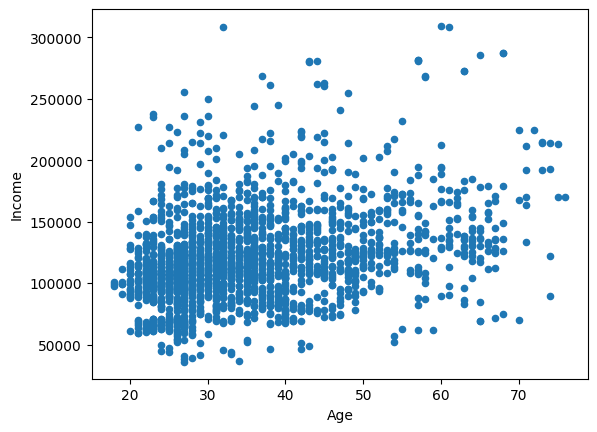

In [8]:
df.plot(kind='scatter',x='Age',y='Income')

<Axes: xlabel='x', ylabel='y'>

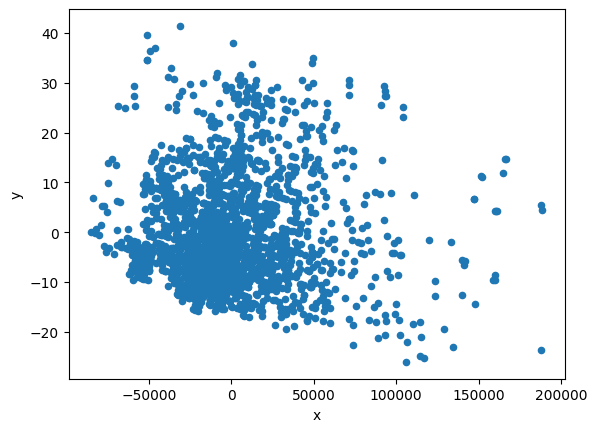

In [11]:
principal_df.plot(kind='scatter',x='x',y='y')

Agora, vamos calcular uma matriz de dissimilaridades usando a distância euclidiana.


In [12]:
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [13]:
M = calcular_matriz_dissimilaridade(df)

In [14]:
Mpca = calcular_matriz_dissimilaridade(principal_df)

# Agrupamento com Single-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\735032587.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'single')


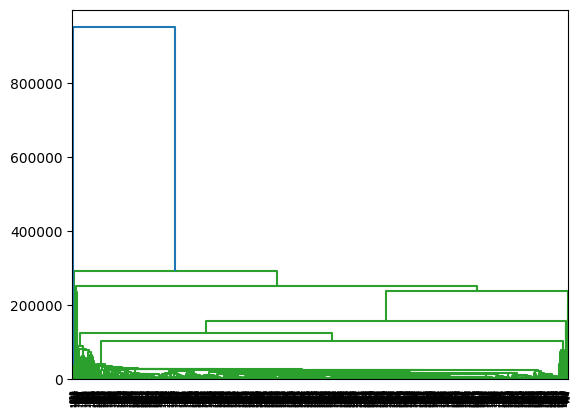

In [15]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\1384943836.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'single')


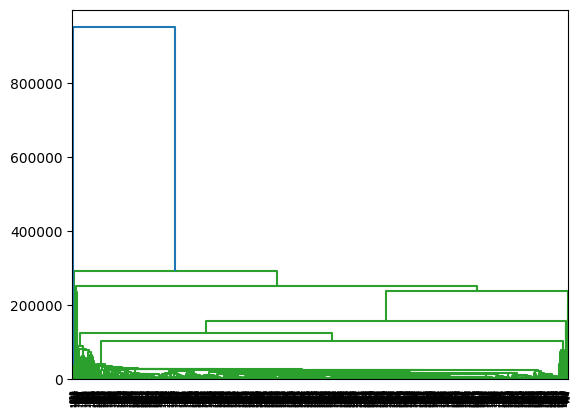

In [16]:
Zpca = hierarchy.linkage(Mpca, 'single')
dendrogram = hierarchy.dendrogram(Zpca)

In [17]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=10)
df.sample(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
1430,1,1,43,2,137689,1,0,0
1771,1,0,43,1,79353,0,0,0
1031,1,1,30,3,133328,0,2,0
62,0,0,61,2,166410,2,1,0
1482,1,0,30,1,110455,1,0,0
521,1,1,24,1,116863,1,1,0
1707,1,1,33,1,43805,0,0,0
757,0,0,39,1,121313,1,1,0
477,0,0,25,0,147402,1,2,0
889,0,0,40,1,167019,1,0,0


In [18]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=10)
principal_df.sample(10)

,x,y,cluster
564,52796.580846,-4.445377,0
144,-13548.420263,-11.497171,0
457,-528.419096,-0.845983,0
169,-5585.419467,-4.330478,0
530,-4606.419391,-3.450397,0
796,51835.582296,9.657527,0
1649,-26629.419593,-4.116408,0
314,-35478.419544,-3.208615,0
125,-16661.419523,-4.190715,0
1261,-565.420029,-9.849079,0


<Axes: xlabel='Age', ylabel='Income'>

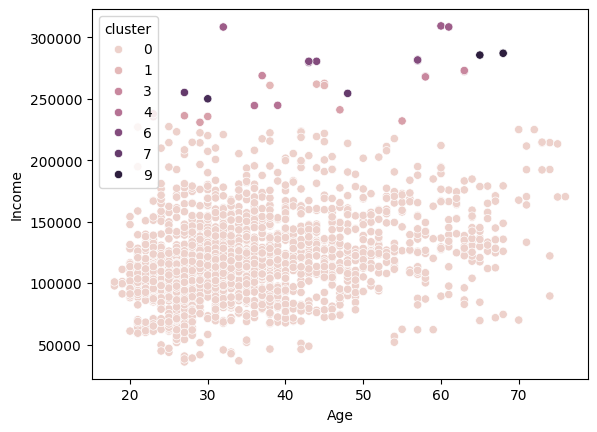

In [19]:
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster")

<Axes: xlabel='x', ylabel='y'>

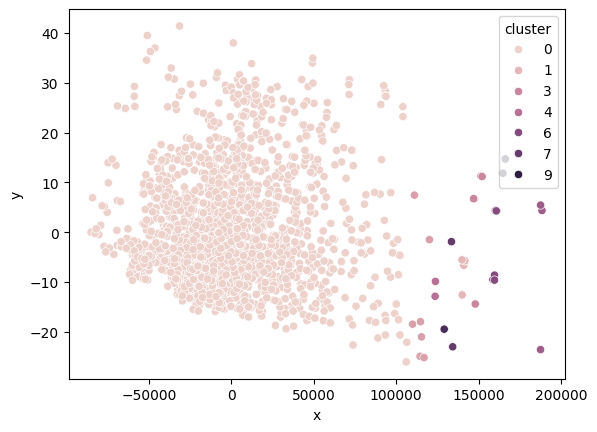

In [20]:
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster")

## Agrupamento com Complete-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\2583415576.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'complete')


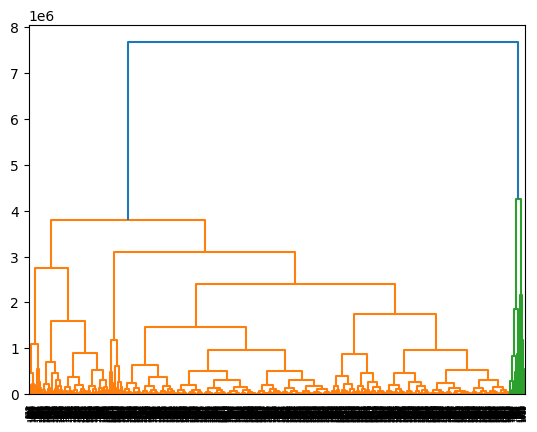

In [21]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\3457296873.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'complete')


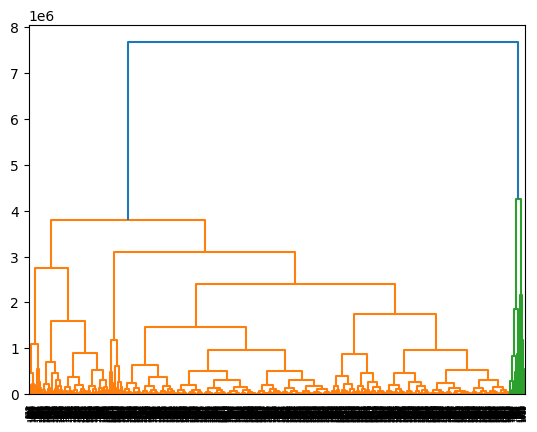

In [22]:
Zpca = hierarchy.linkage(Mpca, 'complete')
dendrogram = hierarchy.dendrogram(Zpca)

<Axes: xlabel='Age', ylabel='Income'>

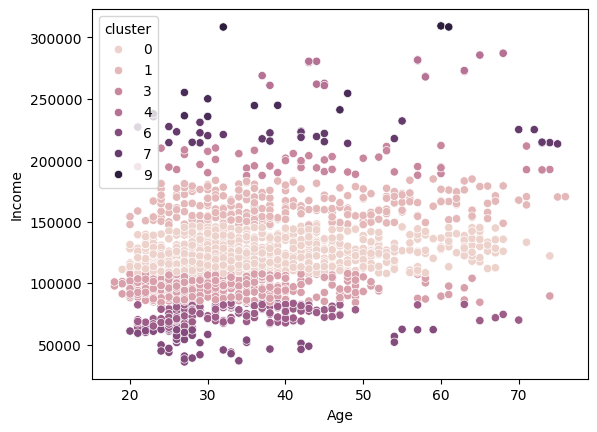

In [23]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=10)
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster")

<Axes: xlabel='x', ylabel='y'>

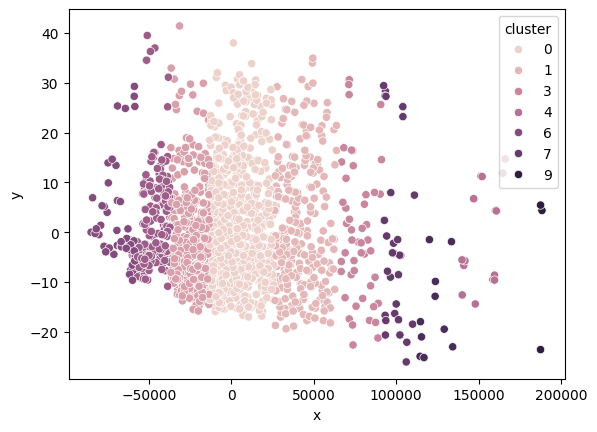

In [24]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=10)
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster")

## Agrupamento com Average-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\3072493606.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'average')


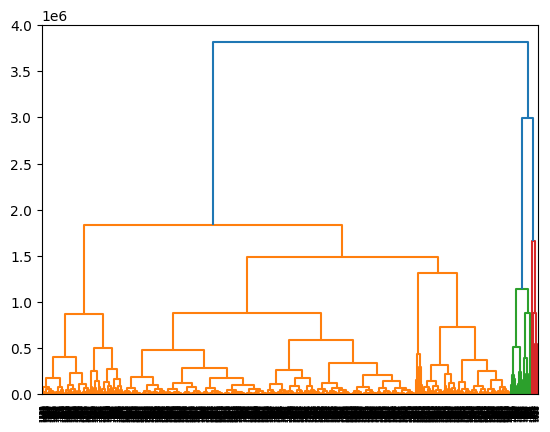

In [25]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_60108\1107897932.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'average')


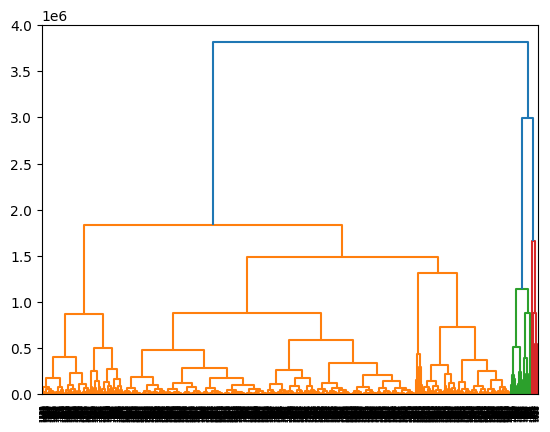

In [26]:
Zpca = hierarchy.linkage(Mpca, 'average')
dendrogram = hierarchy.dendrogram(Zpca)

<Axes: xlabel='Age', ylabel='Income'>

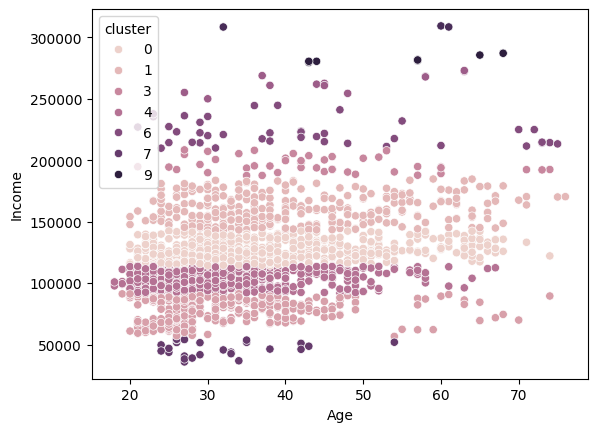

In [27]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=10)
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster")

<Axes: xlabel='x', ylabel='y'>

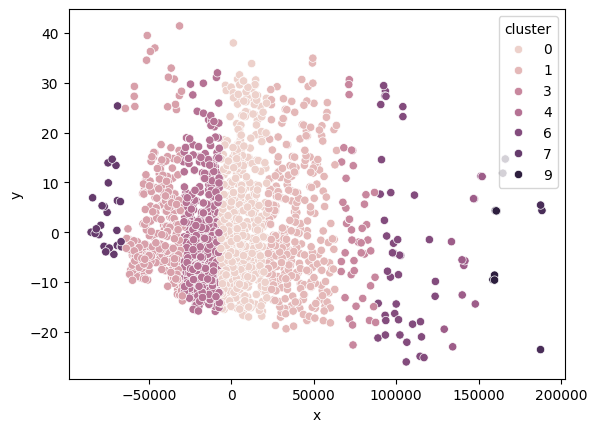

In [28]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=10)
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster")

# K-Means

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,n_init=10,init='random',max_iter=300)
kmeans.fit(df)

KMeans(init='random', n_clusters=10, n_init=10)

In [30]:
df['cluster'] = kmeans.labels_
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,4
1,1,1,22,1,150773,1,2,5
2,0,0,49,1,89210,0,0,7
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,5
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,4
1996,1,1,27,1,117744,1,0,4
1997,0,0,31,0,86400,0,0,7
1998,1,1,24,1,97968,0,0,3


<Axes: xlabel='Age', ylabel='Income'>

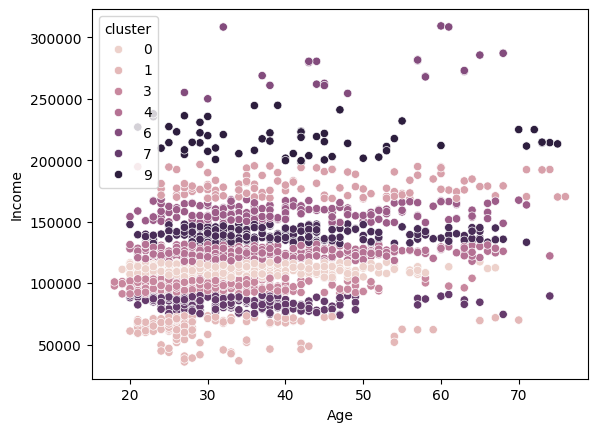

In [31]:
sns.scatterplot(data=df, x='Age', y='Income', hue="cluster")

In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[5.17060367e-01, 5.35433071e-01, 3.32047244e+01, 9.65879265e-01,
        1.10849982e+05, 7.84776903e-01, 6.77165354e-01, 3.01312336e+00],
       [5.48192771e-01, 5.18072289e-01, 2.98072289e+01, 7.59036145e-01,
        6.38402048e+04, 2.22044605e-16, 2.40963855e-02, 2.75301205e+00],
       [3.13043478e-01, 5.04347826e-01, 4.36434783e+01, 1.34782609e+00,
        1.79143043e+05, 1.48695652e+00, 1.26086957e+00, 1.48695652e+00],
       [5.95959596e-01, 5.95959596e-01, 3.06262626e+01, 9.02356902e-01,
        9.84225320e+04, 6.96969697e-01, 5.25252525e-01, 3.95286195e+00],
       [4.40922190e-01, 4.72622478e-01, 3.74899135e+01, 1.07780980e+00,
        1.24520291e+05, 8.81844380e-01, 8.18443804e-01, 1.33226763e-15],
       [2.70114943e-01, 4.42528736e-01, 4.08735632e+01, 1.17241379e+00,
        1.57311506e+05, 1.29310345e+00, 1.33333333e+00, 1.00000000e+00],
       [2.91666667e-01, 4.16666667e-01, 5.04583333e+01, 1.66666667e+00,
        2.76182042e+05, 1.91666667e+00, 1.62500000e+00, 6.

In [33]:
# Erro quadrático
E = kmeans.inertia_
E

64505867892.06998

<Axes: xlabel='x', ylabel='y'>

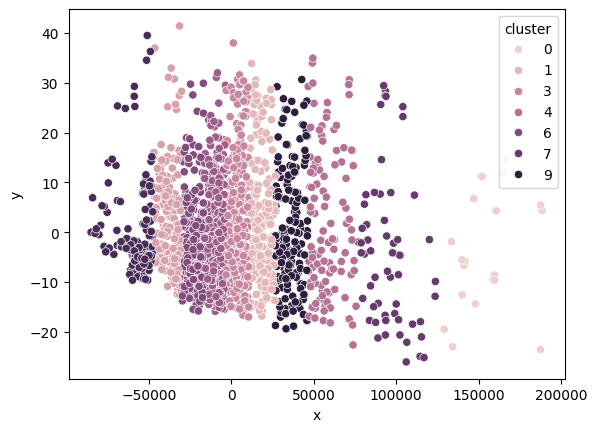

In [34]:
kmeans = KMeans(n_clusters=10,n_init=10,init='random',max_iter=300)
kmeans.fit(principal_df)

principal_df['cluster'] = kmeans.labels_

sns.scatterplot(data=principal_df, x='x', y='y', hue="cluster")

In [35]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.55227623e+05, -1.70119676e+00,  6.87500000e+00],
       [ 1.80517442e+04,  1.97443020e+00,  2.62443439e-01],
       [-3.75427507e+04,  2.68735410e+00,  2.00000000e+00],
       [ 3.46175266e+03,  1.18776459e+00,  8.88178420e-16],
       [ 5.77187148e+04,  1.49695803e+00,  1.46666667e+00],
       [-1.01223087e+04, -1.62381079e+00,  3.02105263e+00],
       [-2.25318874e+04, -2.92481244e+00,  3.95286195e+00],
       [ 9.57643397e+04, -4.11461473e+00,  5.12068966e+00],
       [-5.71142145e+04, -1.19249122e-01,  2.75301205e+00],
       [ 3.53954989e+04,  1.10683744e+00,  1.00000000e+00]])

In [36]:
# Erro quadrático
E = kmeans.inertia_
E

64593980070.52972